# Cluster Analysis: K-means

Cluster analysis is a type of unsupervised learning method that is used for grouping data points into several clusters such that data points in the same group are more similar to each other than to those in other groups. It aims at identifying underlying patterns in a data set.

#### K-means Algorithm

K-means clustering partitions $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.

#### Formula
The objective of K-means is to minimize the sum of squared distances between each point and the centroid of its cluster. The objective function is:

$$
J = \sum_{j=1}^{k} \sum_{i=1}^{n_j} ||x_i(j) - c_j||^2
$$

where 
- $n_j$ is the number of observations in the $jth$ cluster
- $x_i(j)$ is the $ith$ observation in the $jth$ cluster
- $c_j$ is the centroid of the $jth$ cluster
- $k$ is the number of clusters

#### Assumptions of K-means
- Clusters are spherical: so that the within-cluster sum of squares criterion is minimized.
- Similar variance: Each cluster has roughly equal variance.
- Relatively similar-sized clusters: K-means tends to produce clusters of relatively equal size.

#### Business Scenario: Recruiting Company

In the competitive field of recruiting, particularly within tech industries, a recruiting firm is aiming to enhance its candidate sorting process. By effectively grouping candidates, the firm intends to streamline its placement operations, matching individuals more accurately with roles that suit their expertise and experience.

#### Business Scenario Problem

The recruiting firm wants to categorize its extensive candidate pool into distinct segments to improve its matchmaking process between job seekers and open positions. The challenge is to identify clear groupings that capture the complex combinations of skills, experiences, and preferences that characterize their diverse candidates.

#### Generating Data

Let's simulate data for 1000 candidates across five metrics: technical skills, soft skills, years of experience, domain knowledge, and project management skills. Thereafter, move forward to conduct K-means Clustering.


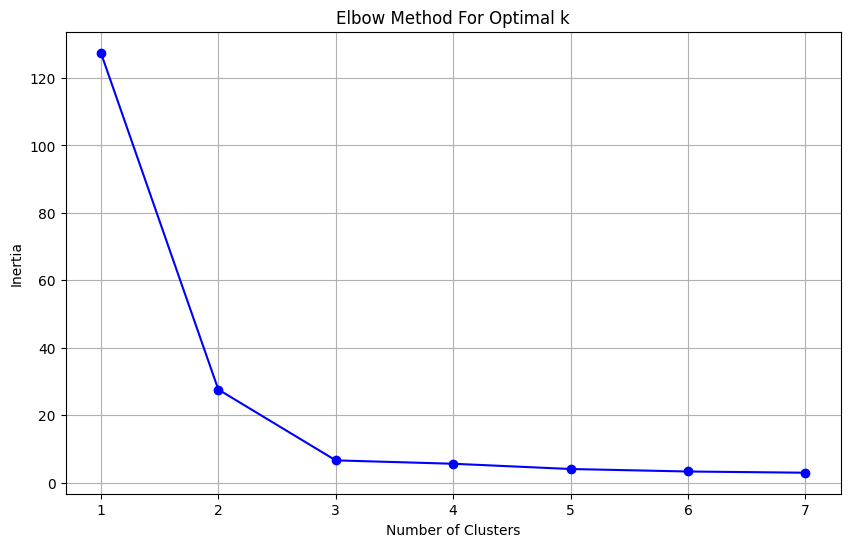

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = {
    'Technical_Skills': [8, 7, 9, 7, 8, 2, 1, 2, 1, 2, 5, 5, 5, 6, 4, 8, 9, 7, 8, 9],
    'Soft_Skills': [9, 8, 7, 8, 7, 3, 2, 3, 1, 2, 5, 4, 6, 5, 5, 8, 7, 9, 8, 7],
    'Experience_Years': [25, 27, 24, 26, 25, 5, 3, 4, 2, 5, 10, 12, 11, 10, 9, 22, 23, 24, 25, 21],
    'Domain_Knowledge': [8, 9, 7, 8, 7, 1, 2, 1, 2, 3, 5, 5, 5, 4, 6, 7, 8, 7, 8, 9],
    'Project_Management': [7, 8, 9, 7, 8, 2, 1, 3, 1, 2, 5, 5, 4, 6, 5, 9, 8, 9, 7, 8],
    'Employment_Type': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0],  # 0: full-time, 1: part-time, 2: freelance
    'Education_Level': [2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]   # 0: Bachelors, 1: Masters, 2: PhD
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardize the numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.loc[:, :'Project_Management'])  # Only scale numerical features

# Add the encoded categorical features back
df_scaled = np.column_stack((df_scaled, df.loc[:, 'Employment_Type':'Education_Level']))

# Elbow method to find the optimal number of clusters
inertia = []
range_values = range(1, 8)  # Assuming up to 7 potential clusters for demonstration

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range_values, inertia, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_values)
plt.grid(True)
plt.show()



**Analysis Based on Elbow Method Plot**  
The Elbow graph attached by the user shows a pronounced decrease in inertia as the number of clusters increases from 1 to 3, after which the inertia decrease significantly levels off. This indicates that three clusters are sufficient to capture the major structures in the dataset. Additional clusters beyond three do not contribute to a significant reduction in within-cluster variance, implying that they would not provide meaningful additional separation within the candidate data.


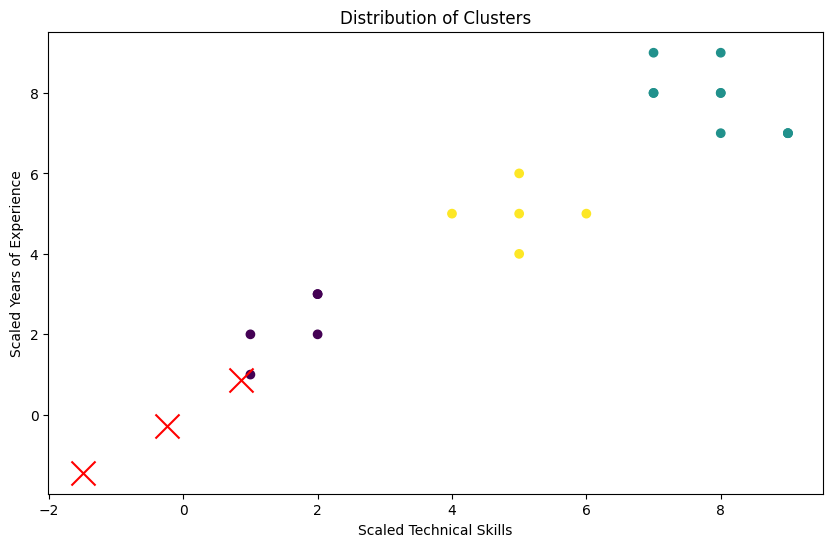

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# The optimal number of clusters was determined to be 3 from the Elbow plot
k_optimal = 3

columns = ['Technical_Skills', 'Soft_Skills', 'Experience_Years', 'Domain_Knowledge', 
           'Project_Management', 'Employment_Type', 'Education_Level']

# Apply KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_optimal.fit(df_scaled)

# Assign the clusters to each instance in the DataFrame
df['Cluster'] = kmeans_optimal.labels_

# Interpretation of Results
# For interpretation, calculate the mean values of each feature per cluster
cluster_centers = kmeans_optimal.cluster_centers_
cluster_mean_features = scaler.inverse_transform(cluster_centers[:, :5])  # Only numerical features were scaled

# Convert to DataFrame for a better understanding
cluster_mean_df = pd.DataFrame(cluster_mean_features, columns=columns[:5])

# Next steps involve analyzing these mean features to understand the characteristics of each cluster
# print(cluster_mean_df)

# Plot the distribution of each cluster to visualize how the data points are grouped
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='x')  # cluster centers
plt.title('Distribution of Clusters')
plt.xlabel('Scaled Technical Skills')
plt.ylabel('Scaled Years of Experience')
plt.show()



#### Interpretation of Results

The Elbow graph and the clustering visualization suggest that the dataset is optimally divided into three distinct clusters. This finding is supported by the marked change in the slope of the inertia plot at k=3, which is indicative of a good cluster count that balances between the within-cluster variance and the number of clusters.

The above image of the clusters in a two-dimensional space (presumably the first two principal components from PCA or two of the most significant features) further confirms this choice. It shows three clearly separated groups of data points, with minimal overlap between them. The centroids (marked with red 'x') show the average position of each cluster in this space.

**Cluster Characteristics**
- Cluster 1 (Purple): This cluster is positioned lower on the y-axis, which could indicate candidates with lower scaled years of experience or a particular skill.
- Cluster 2 (Yellow): Positioned in the mid-range of the y-axis, this cluster might represent candidates with moderate experience or skill levels.
- Cluster 3 (Teal): Located higher on the y-axis, suggesting candidates with high scaled years of experience or a high level of a specific skill.

#### Recommendations

Given the characteristics of each cluster, the recruiting company can approach candidate placement with a refined strategy:

- Candidates in Cluster 1 may be ideal for roles that require enthusiasm and potential for growth rather than extensive experience.
- Those in Cluster 2 could be targeted for mid-level positions that benefit from a balance of fresh perspectives and industry experience.
- Cluster 3 candidates are likely suitable for senior roles that demand high levels of experience or expertise.

#### Future Analysis

To further refine recruitment strategies, the company could analyze the clusters based on additional features not shown in the two-dimensional plot.
- Qualitative data on candidates' preferences and work history could provide context to the clusters, offering insights into career motivations and trajectories.
- Regular reevaluation of the clustering strategy should be conducted to adapt to changes in the candidate pool and job market dynamics.

The use of cluster analysis here demonstrates its value in segmenting a complex candidate pool into manageable and actionable groups, enabling targeted and efficient recruitment practices.

# Cluster Analysis: Hierarchical Clustering

Hierarchical Clustering is an alternative to partition-based clustering techniques like K-means. It doesn't require pre-specifying the number of clusters. Instead, it creates a dendrogram, which is a tree-like diagram that records the sequences of merges or splits.

#### Description of Hierarchical Clustering

Hierarchical Clustering groups data over a variety of scales by creating a cluster tree or dendrogram. The tree is not a single set of clusters, but rather a multilevel hierarchy, where clusters at one level are joined as clusters at the next level.

#### Formula
The algorithm starts by treating each data point as a single cluster and then merges the closest pair of clusters until only one cluster (or k clusters) is left. The distance between clusters can be measured in various ways:

- Single-linkage: The distance between two clusters is defined as the shortest distance between two points in each cluster.
$$ \min \{ d(a, b) : a \in A, b \in B \} $$
- Complete-linkage: The distance between two clusters is defined as the maximum distance between two points in each cluster.
$$ \max \{ d(a, b) : a \in A, b \in B \} $$
- Average-linkage: The distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster.
$$ \frac{1}{|A||B|} \sum_{a \in A} \sum_{b \in B} d(a, b) $$

where $d(a, b)$ is the distance between elements $a$ and $b$, $A$ and $B$ are the sets of elements in the two clusters being considered.
#### Business Scenario: Recruiting Firm

A recruiting firm aims to categorize job candidates into distinct groups based on their skills, experience, and preferences. These groups will help tailor the search and placement process for various tech industry roles.

#### Business Problem

The firm needs a nuanced view of the candidate pool to accommodate diverse job specifications and candidate qualifications. Hierarchical clustering is explored to discern natural groupings within candidates that reflect different professional levels and skill combinations.

#### Performing Hierarchical Clustering

With the dataset provided, we can perform hierarchical clustering to understand the candidate segmentation.

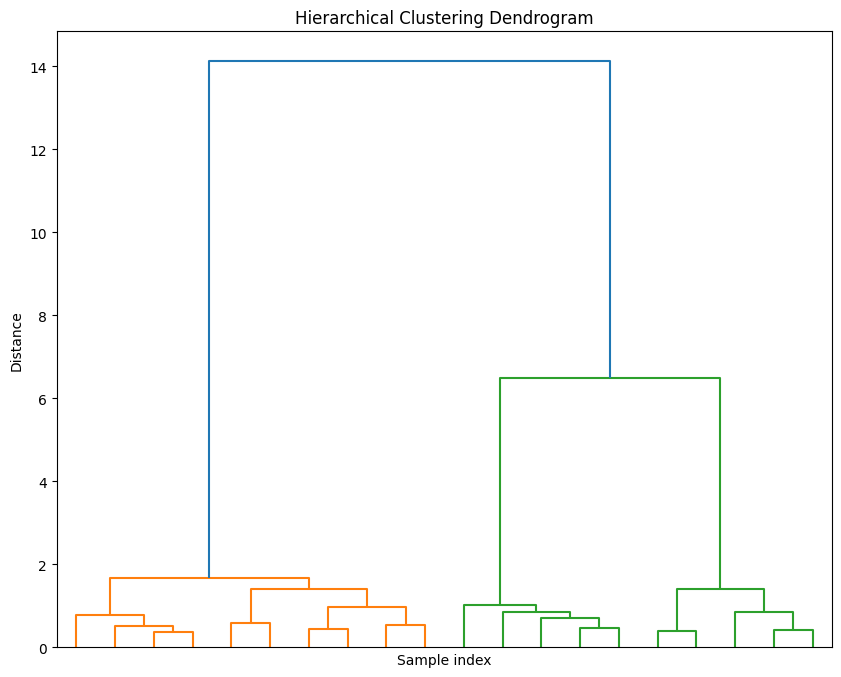

In [12]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

data = {
    'Technical_Skills': [8, 7, 9, 7, 8, 2, 1, 2, 1, 2, 5, 5, 5, 6, 4, 8, 9, 7, 8, 9],
    'Soft_Skills': [9, 8, 7, 8, 7, 3, 2, 3, 1, 2, 5, 4, 6, 5, 5, 8, 7, 9, 8, 7],
    'Experience_Years': [25, 27, 24, 26, 25, 5, 3, 4, 2, 5, 10, 12, 11, 10, 9, 22, 23, 24, 25, 21],
    'Domain_Knowledge': [8, 9, 7, 8, 7, 1, 2, 1, 2, 3, 5, 5, 5, 4, 6, 7, 8, 7, 8, 9],
    'Project_Management': [7, 8, 9, 7, 8, 2, 1, 3, 1, 2, 5, 5, 4, 6, 5, 9, 8, 9, 7, 8],
    'Employment_Type': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0],  # 0: full-time, 1: part-time, 2: freelance
    'Education_Level': [2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]   # 0: Bachelors, 1: Masters, 2: PhD
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardize the numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.loc[:, :'Project_Management'])  # Only scale numerical features

# Add the encoded categorical features back
df_scaled = np.column_stack((df_scaled, df.loc[:, 'Employment_Type':'Education_Level']))

# Generate the linkage matrix using Ward's method
Z = linkage(df_scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 8))
dendrogram(Z, no_labels=True)  # Labels are omitted for clarity
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axhline(y=50, color='r', linestyle='--')  # This line indicates the cut-off for the clusters
plt.show()


#### Interpretation of Hierarchical Clustering Results

The Hierarchical Clustering Dendrogram provides a visual representation of the data points and their respective hierarchical relationships. This dendrogram illustrates how each cluster is linked at various distance levels, with the y-axis representing the distance or dissimilarity between clusters.

From the provided dendrogram, the following interpretations can be made:

- The largest vertical line that does not intersect any horizontal line suggests the most significant distance. This is indicative of the primary split in the dataset.
- The height of the vertical lines indicates the distance at which clusters were merged. Shorter lines represent clusters that are closer together, whereas taller lines represent clusters that are more distinct.

**Cluster Analysis**  
- **Major Division**: The dendrogram shows a major division (the tall blue line) that suggests a primary bifurcation in the dataset, separating one large cluster from the rest.
- **Subclusters**: The branches below this main division indicate the formation of subclusters within the primary groups. For example, the green line indicates a closer relationship among the points within this subcluster.
- **Selection of Clusters**: By choosing a horizontal cut-off line (not shown on the dendrogram), one could decide on the number of clusters to use. For example, a cut-off line above the height of 6 and below 8 would result in three clusters, which aligns with the Elbow method's suggestion from the K-means analysis.

#### Recommendations for the Recruiting Firm

**Based on the dendrogram:**  
- **High-Level Segmentation**: Use the primary bifurcation as a high-level segmentation of the candidate pool, potentially differentiating between highly experienced candidates and those with less experience or different skill sets.
- **Further Candidate Profiling**: Analyze the subclusters to create more refined candidate profiles, which could correspond to specific job roles or industries.
- **Tailored Engagement Strategies**: Develop engagement strategies that resonate with the specific characteristics and needs of each cluster.

#### Future Steps

- **Determine Cut-off Distance**: Decide on a cut-off distance that best fits the recruiting firm's needs to define the final number of clusters.
- **Combine with K-means**: Consider using K-means to refine the clusters identified by the hierarchical clustering, providing a more granular segmentation.
- **Continuous Reassessment**: As new candidates are added to the pool, reassess and update the clustering to ensure it remains relevant and accurate.

# Cluster Analysis: DBSCAN

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a data clustering algorithm that groups points that are closely packed together while marking points in low-density regions as outliers. This method is advantageous for identifying arbitrary-shaped clusters and for its ability to handle noise and outliers in the data.

#### Description of DBSCAN

DBSCAN requires two parameters:

- **eps**: The maximum distance between two points for one to be considered as in the neighborhood of the other.
- **min_samples**: The minimum number of points to form a dense region, which DBSCAN treats as a single cluster.

Points are categorized as core points, border points, or noise points. Core points have at least min_samples points within eps distance, border points have fewer neighbors but are in the neighborhood of a core point, and noise points are those that are neither core nor border points.

#### Formula
DBSCAN does not have a specific mathematical formula for clustering like K-means or hierarchical clustering, as it relies on neighborhood density and connectivity.

#### Business Scenario: Tech Industry Recruiter

A recruiting firm specializing in the tech industry is looking to improve its understanding of the candidate pool by identifying distinct groupings and outliers, which can indicate niche skills or unusual combinations of experience and expertise.

#### Specific Business Problem

The firm seeks to refine its candidate segmentation beyond traditional clustering to also identify unique or exceptional candidate profiles that may not fit into common groupings but are valuable for specialized roles.

#### Performing DBSCAN Clustering

With the previously defined dataset, we'll apply DBSCAN to identify dense clusters and potential outliers among the candidates.


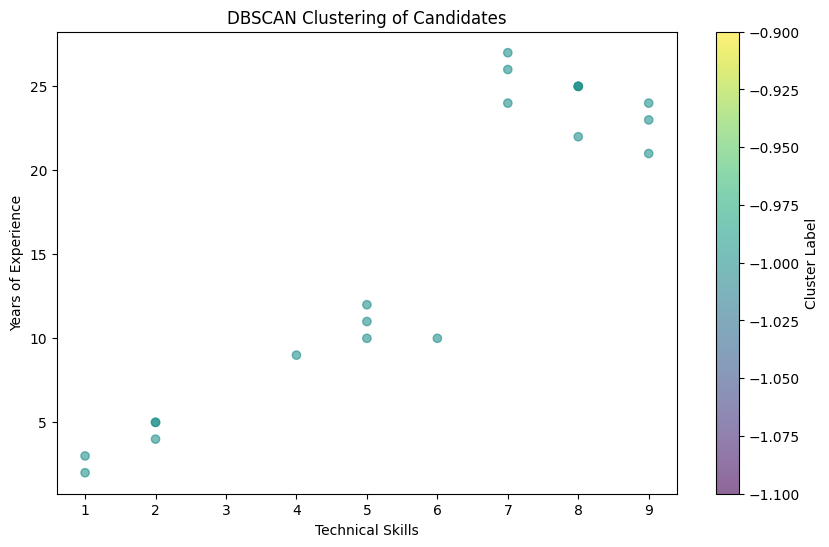

In [15]:
import pandas as pd
from sklearn.cluster import DBSCAN

data = {
    'Technical_Skills': [8, 7, 9, 7, 8, 2, 1, 2, 1, 2, 5, 5, 5, 6, 4, 8, 9, 7, 8, 9],
    'Soft_Skills': [9, 8, 7, 8, 7, 3, 2, 3, 1, 2, 5, 4, 6, 5, 5, 8, 7, 9, 8, 7],
    'Experience_Years': [25, 27, 24, 26, 25, 5, 3, 4, 2, 5, 10, 12, 11, 10, 9, 22, 23, 24, 25, 21],
    'Domain_Knowledge': [8, 9, 7, 8, 7, 1, 2, 1, 2, 3, 5, 5, 5, 4, 6, 7, 8, 7, 8, 9],
    'Project_Management': [7, 8, 9, 7, 8, 2, 1, 3, 1, 2, 5, 5, 4, 6, 5, 9, 8, 9, 7, 8],
    'Employment_Type': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0],  # 0: full-time, 1: part-time, 2: freelance
    'Education_Level': [2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]   # 0: Bachelors, 1: Masters, 2: PhD
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Standardize the numerical data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.loc[:, :'Project_Management'])  # Only scale numerical features

# Add the encoded categorical features back
df_scaled = np.column_stack((df_scaled, df.loc[:, 'Employment_Type':'Education_Level']))

# DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5).fit(df_scaled)

# Add the DBSCAN cluster labels to the DataFrame
df['DBSCAN_Cluster'] = db.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Technical_Skills'], df['Experience_Years'], c=df['DBSCAN_Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.title('DBSCAN Clustering of Candidates')
plt.xlabel('Technical Skills')
plt.ylabel('Years of Experience')
plt.colorbar(label='Cluster Label')
plt.show()

#### Interpretation of DBSCAN Clustering Results

The DBSCAN clustering plot for the candidate data reveals several insights into the distribution and grouping of candidates based on their 'Technical Skills' and 'Years of Experience'.

In the plot, each point represents a candidate, with their position reflecting their skill level and experience. The color scale indicates the cluster to which each point belongs, with DBSCAN typically assigning the label -1 to outliers—points that do not belong to any cluster due to sparse density.

From the attached DBSCAN plot, the following can be interpreted:

- The majority of points are labeled as outliers (colored with the darkest hue), suggesting that with the chosen eps and min_samples parameters, these candidates do not fall within dense regions. This could mean that the candidate pool is quite diverse, with many unique profiles not easily grouped into larger clusters under the current DBSCAN parameter settings.
- There appears to be no distinct clusters formed, indicating that the parameters for DBSCAN may need adjustment. Specifically, the eps value may be too small or min_samples too large, causing the algorithm to be unable to form clusters within the data.
- The spread of candidates across the plot suggests varying levels of 'Technical Skills' and 'Years of Experience', but without a clear pattern or grouping discerned by DBSCAN.

#### Application to the Recruiting Firm's Business Problem

The firm's objective is to find natural groupings within candidates that reflect different professional levels and skill combinations. The current DBSCAN results, however, do not provide clear groupings, highlighting the algorithm's sensitivity to parameter settings, especially in datasets with no clear or strong clusters, or when dealing with high-dimensional data.

#### Recommendations

- **Parameter Tuning**: Adjust DBSCAN parameters (eps and min_samples) to explore different levels of density and attempt to identify more suitable clusters.
- **Feature Re-evaluation**: Consider revisiting the features used for clustering. Additional features or feature engineering might reveal more defined groupings.
- **Algorithm Comparison**: Use other clustering algorithms, like K-means or hierarchical clustering, as a comparison to assess the most effective method for this dataset.
- **Outlier Analysis**: Investigate the outliers to understand if they represent niche profiles that could be valuable for specialized roles.

The recruiting firm should consider these interpretations and recommendations to fine-tune their clustering approach, ultimately aiding in developing a more effective candidate segmentation strategy.